In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn import preprocessing
import scipy.stats as stats
import pylab as py

D:\anaconda3\New\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


[Text(1, 0, 'few_hair'),
 Text(2, 0, 'low_middle'),
 Text(3, 0, 'high_middle'),
 Text(4, 0, 'very_hairy')]

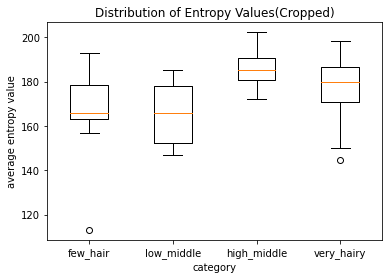

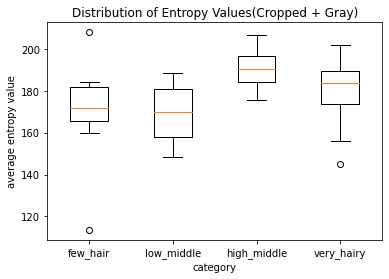

In [90]:
#image with close cropping of bee
few_hair = pd.read_csv("FH_Results.csv", index_col = False )
high_middle = pd.read_csv("HM_Results.csv",index_col = False)
low_middle= pd.read_csv("LM_Results.csv", index_col = False)
very_hairy = pd.read_csv("VH_Results.csv", index_col = False)

#image with close cropping of bee + entropy calculation using grayscale
few_hair_gray = pd.read_csv("FH_Results_gray.csv", index_col = False )
high_middle_gray = pd.read_csv("HM_Results_gray.csv",index_col = False)
low_middle_gray= pd.read_csv("LM_Results_gray.csv", index_col = False)
very_hairy_gray = pd.read_csv("VH_Results_gray.csv", index_col = False)

#image with no cropping(full image)
few_hair_full = pd.read_csv("FH_Results_full.csv", index_col = False )
high_middle_full = pd.read_csv("HM_Results_full.csv",index_col = False)
low_middle_full= pd.read_csv("LM_Results_full.csv", index_col = False)
very_hairy_full = pd.read_csv("VH_Results_full.csv", index_col = False)

#image with no cropping(full image) + entropy calculation using grayscale
few_hair_full_gray = pd.read_csv("FH_Results_full_gray.csv", index_col = False )
high_middle_full_gray = pd.read_csv("HM_Results_full_gray.csv",index_col = False)
low_middle_full_gray= pd.read_csv("LM_Results_full_gray.csv", index_col = False)
very_hairy_full_gray = pd.read_csv("VH_Results_full_gray.csv", index_col = False)

entropy_dict = {}
entropy_dict["few_hair"] = few_hair.Reg1AvgEntropy.values
entropy_dict["low_middle"] = low_middle.Reg1AvgEntropy.values
entropy_dict["high_middle"] = high_middle.Reg1AvgEntropy.values
entropy_dict["very_hairy"] = very_hairy.Reg1AvgEntropy.values

entropy_dict_gray = {}
entropy_dict_gray["few_hair"] = few_hair_gray.Reg1AvgEntropy.values
entropy_dict_gray["low_middle"] = low_middle_gray.Reg1AvgEntropy.values
entropy_dict_gray["high_middle"] = high_middle_gray.Reg1AvgEntropy.values
entropy_dict_gray["very_hairy"] = very_hairy_gray.Reg1AvgEntropy.values

entropy_dict_full = {}
entropy_dict_full["few_hair"] = few_hair_full.Reg1AvgEntropy.values
entropy_dict_full["low_middle"] = low_middle_full.Reg1AvgEntropy.values
entropy_dict_full["high_middle"] = high_middle_full.Reg1AvgEntropy.values
entropy_dict_full["very_hairy"] = very_hairy_full.Reg1AvgEntropy.values

entropy_dict_full_gray  = {}
entropy_dict_full_gray["few_hair"] = few_hair_full_gray.Reg1AvgEntropy.values
entropy_dict_full_gray["low_middle"] = low_middle_full_gray.Reg1AvgEntropy.values
entropy_dict_full_gray["high_middle"] = high_middle_full_gray.Reg1AvgEntropy.values
entropy_dict_full_gray["very_hairy"] = very_hairy_full_gray.Reg1AvgEntropy.values

fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Cropped)")
ax.boxplot(entropy_dict.values())
ax.set_xticklabels(entropy_dict.keys())

fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Cropped + Gray)")
ax.boxplot(entropy_dict_gray.values())
ax.set_xticklabels(entropy_dict_gray.keys())

[Text(1, 0, 'few_hair'),
 Text(2, 0, 'low_middle'),
 Text(3, 0, 'high_middle'),
 Text(4, 0, 'very_hairy')]

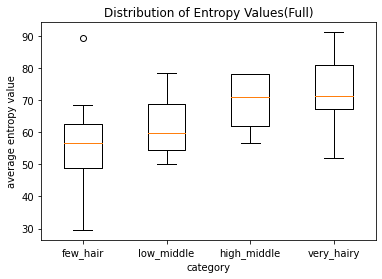

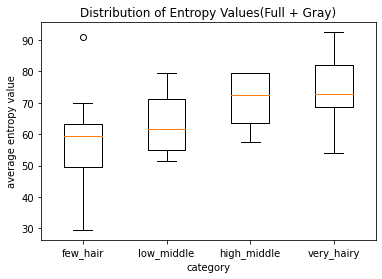

In [3]:
fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Full)")
ax.boxplot(entropy_dict_full.values())
ax.set_xticklabels(entropy_dict_full.keys())

fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Full + Gray)")
ax.boxplot(entropy_dict_full_gray.values())
ax.set_xticklabels(entropy_dict_full_gray.keys())

In [4]:
#combining middles
M_results = pd.concat([low_middle, high_middle])
M_results.reset_index(drop=True, inplace=True)
M_results.to_csv("MH_results.csv", index = False)

M_results_gray = pd.concat([low_middle_gray,high_middle_gray])
M_results_gray.reset_index(drop=True, inplace=True)
M_results_gray.to_csv("MH_results_gray.csv",index = False)

M_results_full = pd.concat([low_middle_full,high_middle_full])
M_results_full.reset_index(drop=True, inplace=True)
M_results_full.to_csv("MH_results_full.csv",index = False)

M_results_full_gray = pd.concat([low_middle_full_gray,high_middle_full_gray])
M_results_full_gray.reset_index(drop=True, inplace=True)
M_results_full_gray.to_csv("MH_results_full_gray.csv",index = False)

In [91]:
entropy_dict["middle_hair"] = np.concatenate((entropy_dict["low_middle"],entropy_dict["high_middle"]))
entropy_dict_gray["middle_hair"] = np.concatenate((entropy_dict_gray["low_middle"],entropy_dict_gray["high_middle"]))
entropy_dict_full["middle_hair"] = np.concatenate((entropy_dict_full["low_middle"],entropy_dict_full["high_middle"]))
entropy_dict_full_gray["middle_hair"] = np.concatenate((entropy_dict_full_gray["low_middle"],entropy_dict_full_gray["high_middle"]))

In [92]:
#removing low and high middles

entropy_dict.pop("low_middle")
entropy_dict.pop("high_middle")
x = entropy_dict.pop("very_hairy")
entropy_dict["very_hairy"] = x 

entropy_dict_gray.pop("low_middle")
entropy_dict_gray.pop("high_middle")
x = entropy_dict_gray.pop("very_hairy")
entropy_dict_gray["very_hairy"] = x 

entropy_dict_full.pop("low_middle")
entropy_dict_full.pop("high_middle")
x = entropy_dict_full.pop("very_hairy")
entropy_dict_full["very_hairy"] = x 

entropy_dict_full_gray.pop("low_middle")
entropy_dict_full_gray.pop("high_middle")
x = entropy_dict_full_gray.pop("very_hairy")
entropy_dict_full_gray["very_hairy"] = x 

In [93]:
entropy_dict_full

{'few_hair': array([42.878, 47.943, 68.464, 56.08 , 49.619, 62.694, 62.507, 57.246,
        56.52 , 89.24 , 29.551]),
 'middle_hair': array([52.38 , 50.257, 59.964, 74.236, 52.904, 55.188, 59.64 , 67.136,
        56.52 , 78.422, 75.402, 62.571, 78.158, 63.838, 78.082, 56.759]),
 'very_hairy': array([65.057, 71.749, 72.373, 52.136, 68.69 , 69.606, 54.271, 64.211,
        70.501, 72.999, 70.578, 58.283, 91.144, 83.402, 67.839, 86.479,
        72.418, 85.447, 80.625, 71.172, 81.647, 57.419, 88.579, 76.08 ])}

[Text(1, 0, 'few_hair'), Text(2, 0, 'middle_hair'), Text(3, 0, 'very_hairy')]

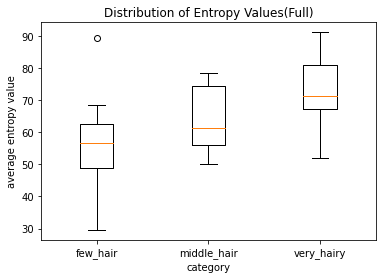

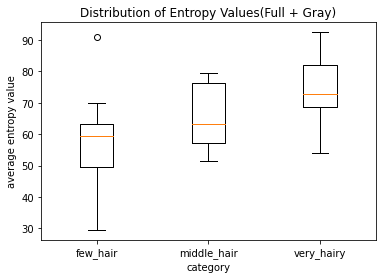

In [94]:
fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Full)")
ax.boxplot(entropy_dict_full.values())
ax.set_xticklabels(entropy_dict_full.keys())

fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Full + Gray)")
ax.boxplot(entropy_dict_full_gray.values())
ax.set_xticklabels(entropy_dict_full_gray.keys())

[Text(1, 0, 'few_hair'), Text(2, 0, 'middle_hair'), Text(3, 0, 'very_hairy')]

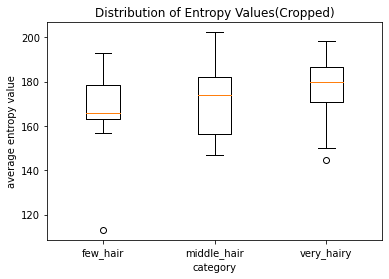

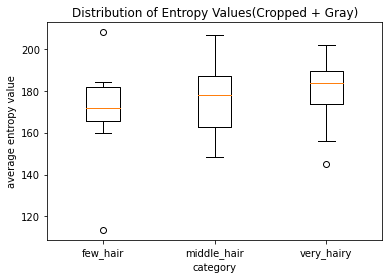

In [95]:
fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Cropped)")
ax.boxplot(entropy_dict.values())
ax.set_xticklabels(entropy_dict.keys())

fig, ax = plt.subplots()

plt.xlabel('category') 
plt.ylabel('average entropy value') 
  
# displaying the title
plt.title("Distribution of Entropy Values(Cropped + Gray)")
ax.boxplot(entropy_dict_gray.values())
ax.set_xticklabels(entropy_dict_gray.keys())

0.2264154702425003
0.2535737156867981
0.5729722380638123
0.5934628248214722
0.4545149505138397
0.6934915781021118
0.06609923392534256
0.07213295996189117


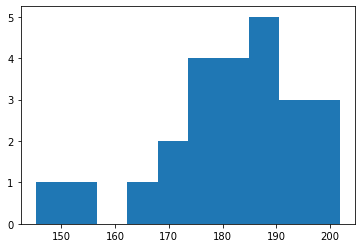

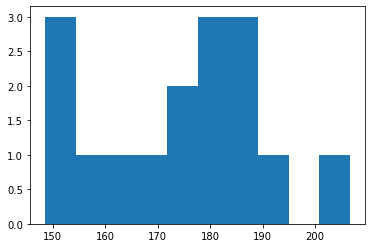

In [8]:
#very_hairy vs M_results
#very_hairy_gray vs M_results_gray
#very_hairy_full vs M_results_full
#very_hairy_full_gray vs M_results_full_gray

#check normality
#check histogram

fig, ax = plt.subplots()
ax.hist(very_hairy_gray["Reg1AvgEntropy"])
ig, ax = plt.subplots()
ax.hist(M_results_gray["Reg1AvgEntropy"])

#check Shapiro-Wilk test
#null:population is normally distributed
#alternative: data is not normally distributed

#very hair

w, pvalue = stats.shapiro(very_hairy["Reg1AvgEntropy"])
print(pvalue)

w, pvalue = stats.shapiro(very_hairy_gray["Reg1AvgEntropy"])
print(pvalue)

w, pvalue = stats.shapiro(very_hairy_full["Reg1AvgEntropy"])
print(pvalue)

w, pvalue = stats.shapiro(very_hairy_full_gray["Reg1AvgEntropy"])
print(pvalue)

#middle hair
w, pvalue = stats.shapiro(M_results["Reg1AvgEntropy"])
print(pvalue)
w, pvalue = stats.shapiro(M_results_gray["Reg1AvgEntropy"])
print(pvalue)
w, pvalue = stats.shapiro(M_results_full["Reg1AvgEntropy"])
print(pvalue)
w, pvalue = stats.shapiro(M_results_full_gray["Reg1AvgEntropy"])
print(pvalue)


#print(pvalue)
#all fail to reject, do not have sufficient evidence to conclude that data is not normally distributed 

D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The ke

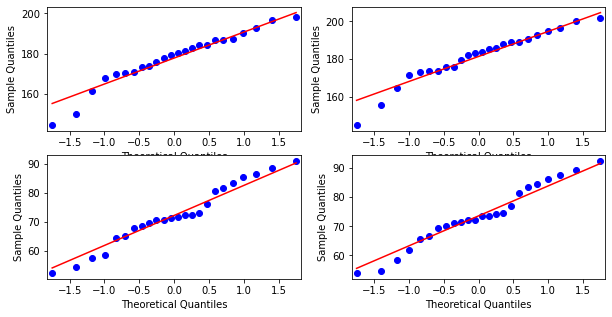

In [50]:
#very_hairy vs M_results
#very_hairy_gray vs M_results_gray
#very_hairy_full vs M_results_full
#very_hairy_full_gray vs M_results_full_gray

#check qqplot
#very-hairy
fig, ax = plt.subplots(2,2,figsize=(10,5))

sm.qqplot(very_hairy["Reg1AvgEntropy"], line = "s",ax = ax[0][0])
sm.qqplot(very_hairy_gray["Reg1AvgEntropy"], line = "s", ax = ax[0][1])
sm.qqplot(very_hairy_full["Reg1AvgEntropy"], line = "s", ax = ax[1][0])
sm.qqplot(very_hairy_full_gray["Reg1AvgEntropy"], line = "s", ax = ax[1][1])
py.show()


D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\New\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The ke

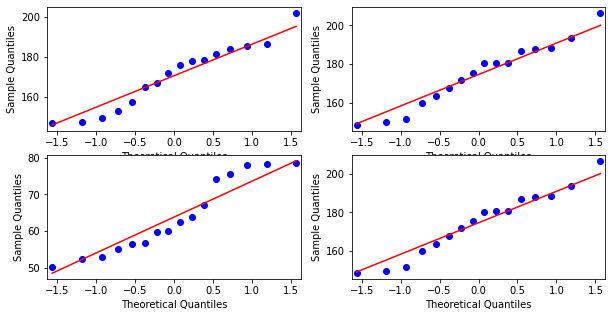

In [52]:
fig, ax = plt.subplots(2,2,figsize=(10,5))

sm.qqplot(M_results["Reg1AvgEntropy"], line = "s",ax = ax[0][0])
sm.qqplot(M_results_gray["Reg1AvgEntropy"], line = "s", ax = ax[0][1])
sm.qqplot(M_results_full["Reg1AvgEntropy"], line = "s", ax = ax[1][0])
sm.qqplot(M_results_gray["Reg1AvgEntropy"], line = "s", ax = ax[1][1])
py.show()

In [9]:
#check variance
#rule of thumb: ratio of variances <4 (larger/smaller), assume equal variances
print(np.var(very_hairy["Reg1AvgEntropy"]), np.var(M_results["Reg1AvgEntropy"]))
print(np.var(very_hairy_gray["Reg1AvgEntropy"]), np.var(M_results_gray["Reg1AvgEntropy"]))
print(np.var(very_hairy_full["Reg1AvgEntropy"]), np.var(M_results_full["Reg1AvgEntropy"]))
print(np.var(very_hairy_full_gray["Reg1AvgEntropy"]), np.var(M_results_full_gray["Reg1AvgEntropy"]))

166.29941882638892 247.65656287500005
176.0597268888888 263.76787374609364
108.49442612326386 95.08587880859373
105.66939088888888 98.98658585937501


In [53]:
#perform two sample t-test with equal variances

#null hypothesis: the means of the distributions are equal
#alternative: the mean of entropy value for hairy bees is greater than mean of entropy value for middle hairy bees

print(stats.ttest_ind(a=very_hairy["Reg1AvgEntropy"], b=M_results["Reg1AvgEntropy"], equal_var=True, 
                     alternative = "greater"))
#since p-value is large, we fail to reject. Do not have sufficient evidence to show the means of entropy for very hairy 
#is greater than means of entropy for middle hairy

print(stats.ttest_ind(a=very_hairy_gray["Reg1AvgEntropy"], b=M_results_gray["Reg1AvgEntropy"], equal_var=True, 
                     alternative = "greater" ))
#since p-value is large, we fail to reject. Do not have sufficient evidence to show the means of entropy for very hairy 
#is greater than means of entropy for middle hairy

print(stats.ttest_ind(a=very_hairy_full["Reg1AvgEntropy"], b=M_results_full["Reg1AvgEntropy"], equal_var=True, 
                     alternative = "greater"))
#since p-value is small, we reject null hypothesis. Data favors alternative hypothesis.

print(stats.ttest_ind(a=very_hairy_full_gray["Reg1AvgEntropy"], b=M_results_full_gray["Reg1AvgEntropy"], equal_var=True, 
                     alternative = "greater"))
#since p-value is small, we reject null hypothesis. Data favors alternative hypothesis.

Ttest_indResult(statistic=1.5236756480506617, pvalue=0.06793478970229565)
Ttest_indResult(statistic=1.421815448299735, pvalue=0.0816180118216331)
Ttest_indResult(statistic=2.484552401702546, pvalue=0.008746471095431616)
Ttest_indResult(statistic=2.474565636129937, pvalue=0.008959020399499668)


In [54]:
#perform two sample t-test with Mann-Whitney U Test
#null hypothesis: two groups have the same mean entropy
#alternative: hairier group have a larger average entropy than middle hair group

print(stats.mannwhitneyu(x = very_hairy["Reg1AvgEntropy"] , y = M_results["Reg1AvgEntropy"], alternative = "greater"))
#fail to reject, do not have sufficient evidence to conclude alternative

print(stats.mannwhitneyu(x = very_hairy_gray["Reg1AvgEntropy"] , y = M_results_gray["Reg1AvgEntropy"], alternative = "greater"))
#fail to reject, do not have sufficient evidence to conclude alternative

print(stats.mannwhitneyu(x = very_hairy_full["Reg1AvgEntropy"] , y = M_results_full["Reg1AvgEntropy"], alternative = "greater"))
#reject, data favors alternative

print(stats.mannwhitneyu(x = very_hairy_full_gray["Reg1AvgEntropy"] , y = M_results_full_gray["Reg1AvgEntropy"], alternative = "greater"))
#reject, data favors alternative

MannwhitneyuResult(statistic=244.0, pvalue=0.07754130343264433)
MannwhitneyuResult(statistic=243.0, pvalue=0.08162890835239156)
MannwhitneyuResult(statistic=271.0, pvalue=0.015109091111670938)
MannwhitneyuResult(statistic=272.0, pvalue=0.014088019999978735)
